In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Customer Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()    # here totalcharges must me float but it was string 
             # Because there was blanks so its showing as string 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no charges are recorded

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [8]:
df.isnull().sum().sum() 

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

0

In [11]:
def conv(value):      
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

#Converted 0 and 1 values of senior citizen to YES/no to make easier to understand

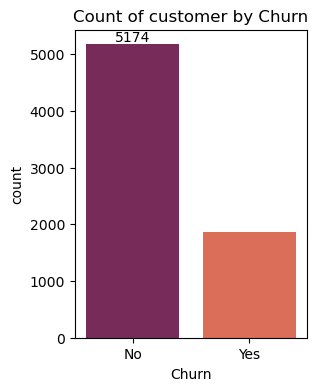

In [13]:
plt.figure(figsize=(3,4))
ax=sns.countplot(data=df ,x='Churn',palette='rocket')

ax.bar_label(ax.containers[0])
plt.title('Count of customer by Churn')
plt.show()


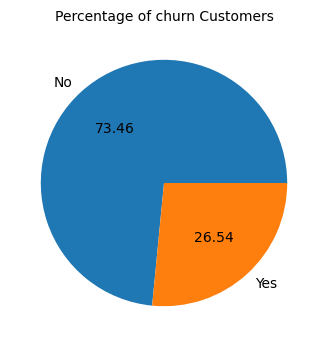

In [14]:
plt.figure(figsize=(4,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
gb
plt.pie(gb['Churn'] ,labels=gb.index,autopct="%1.2f" )
plt.title('Percentage of churn Customers',fontsize=10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out 
#Now explore the reason behind it

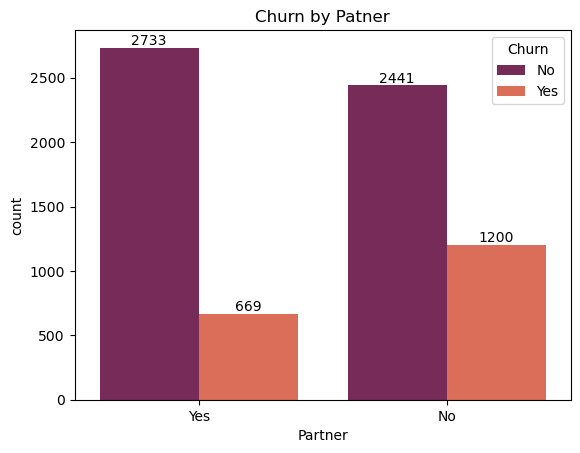

In [16]:
ax=sns.countplot(data=df,x='Partner',hue='Churn',palette='rocket')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn by Patner')
plt.show()

In [17]:
#Comparetively customer with partners have less Churn rate then with out partner

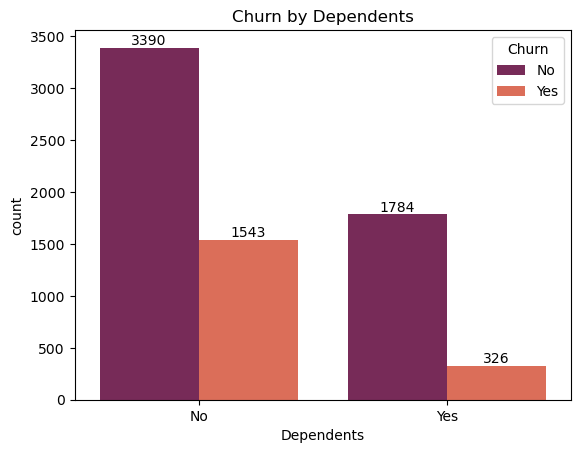

In [18]:
ax=sns.countplot(data=df,x='Dependents',hue='Churn',palette='rocket')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn by Dependents')
plt.show()

#customers with Dependents have less Churn rate then customers with Independents

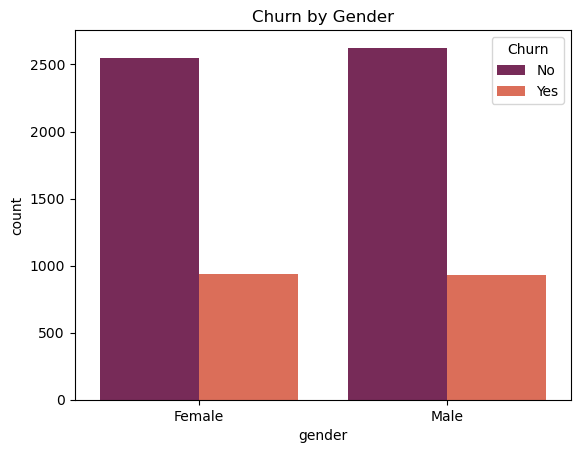

In [20]:
sns.countplot(x='gender',data=df,hue='Churn',palette='rocket')
plt.title('Churn by Gender')
plt.show()

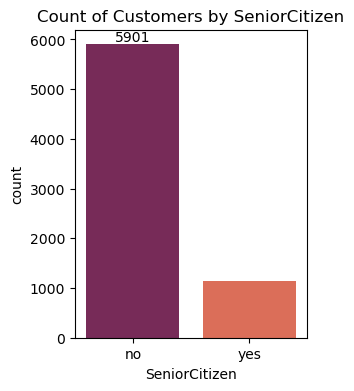

In [21]:
plt.figure(figsize=(3,4))
ax=sns.countplot(data=df ,x='SeniorCitizen',palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by SeniorCitizen')
plt.show()


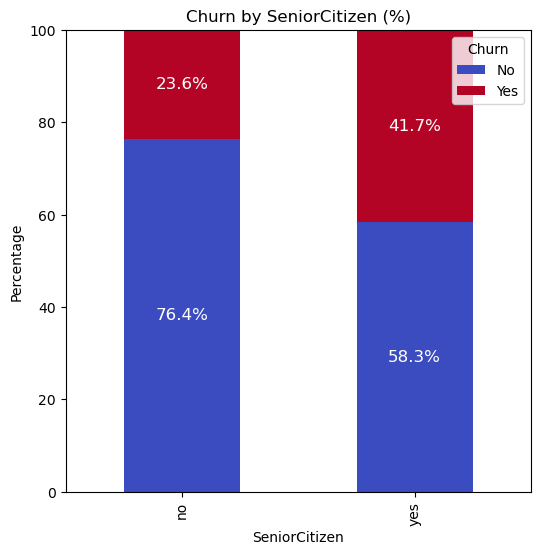

In [22]:
# Calculate counts
count_data = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100  # Convert to percentage

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6,6))
count_data.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Add percentage labels
for i in range(len(count_data)):
    cumulative_height = 0  # Track bar heights for stacking
    for j in range(len(count_data.columns)):
        percentage = count_data.iloc[i, j]
        if percentage > 0:  # Avoid showing 0% labels
            ax.text(i, cumulative_height + percentage / 2, f'{percentage:.1f}%', 
                    ha='center', va='center', color='white', fontsize=12)
        cumulative_height += percentage

# Formatting
plt.title('Churn by SeniorCitizen (%)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Ensure the y-axis represents percentages
plt.legend(title='Churn', loc='upper right')
plt.show()

#comparative a greater percentage of people in senior citizen category have churned

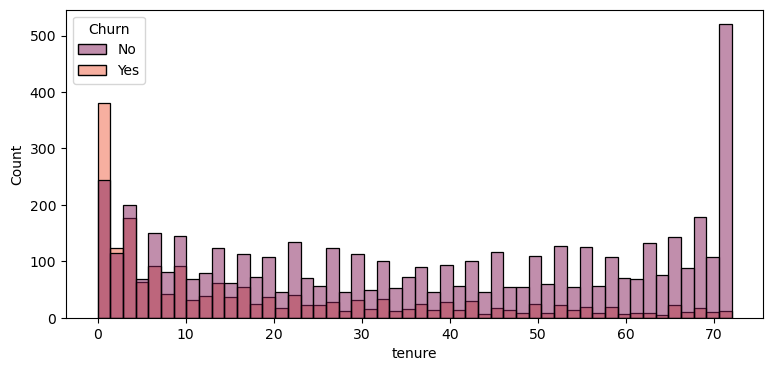

In [24]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=50,hue='Churn',palette='rocket')
plt.show()

#people who have used our services fro long time have stayed and people who have used our service for 1 or 2 months have churnd


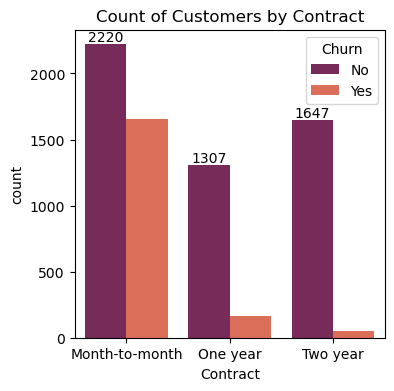

In [26]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=df,x='Contract',hue='Churn',palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract')
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years contract

In [28]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

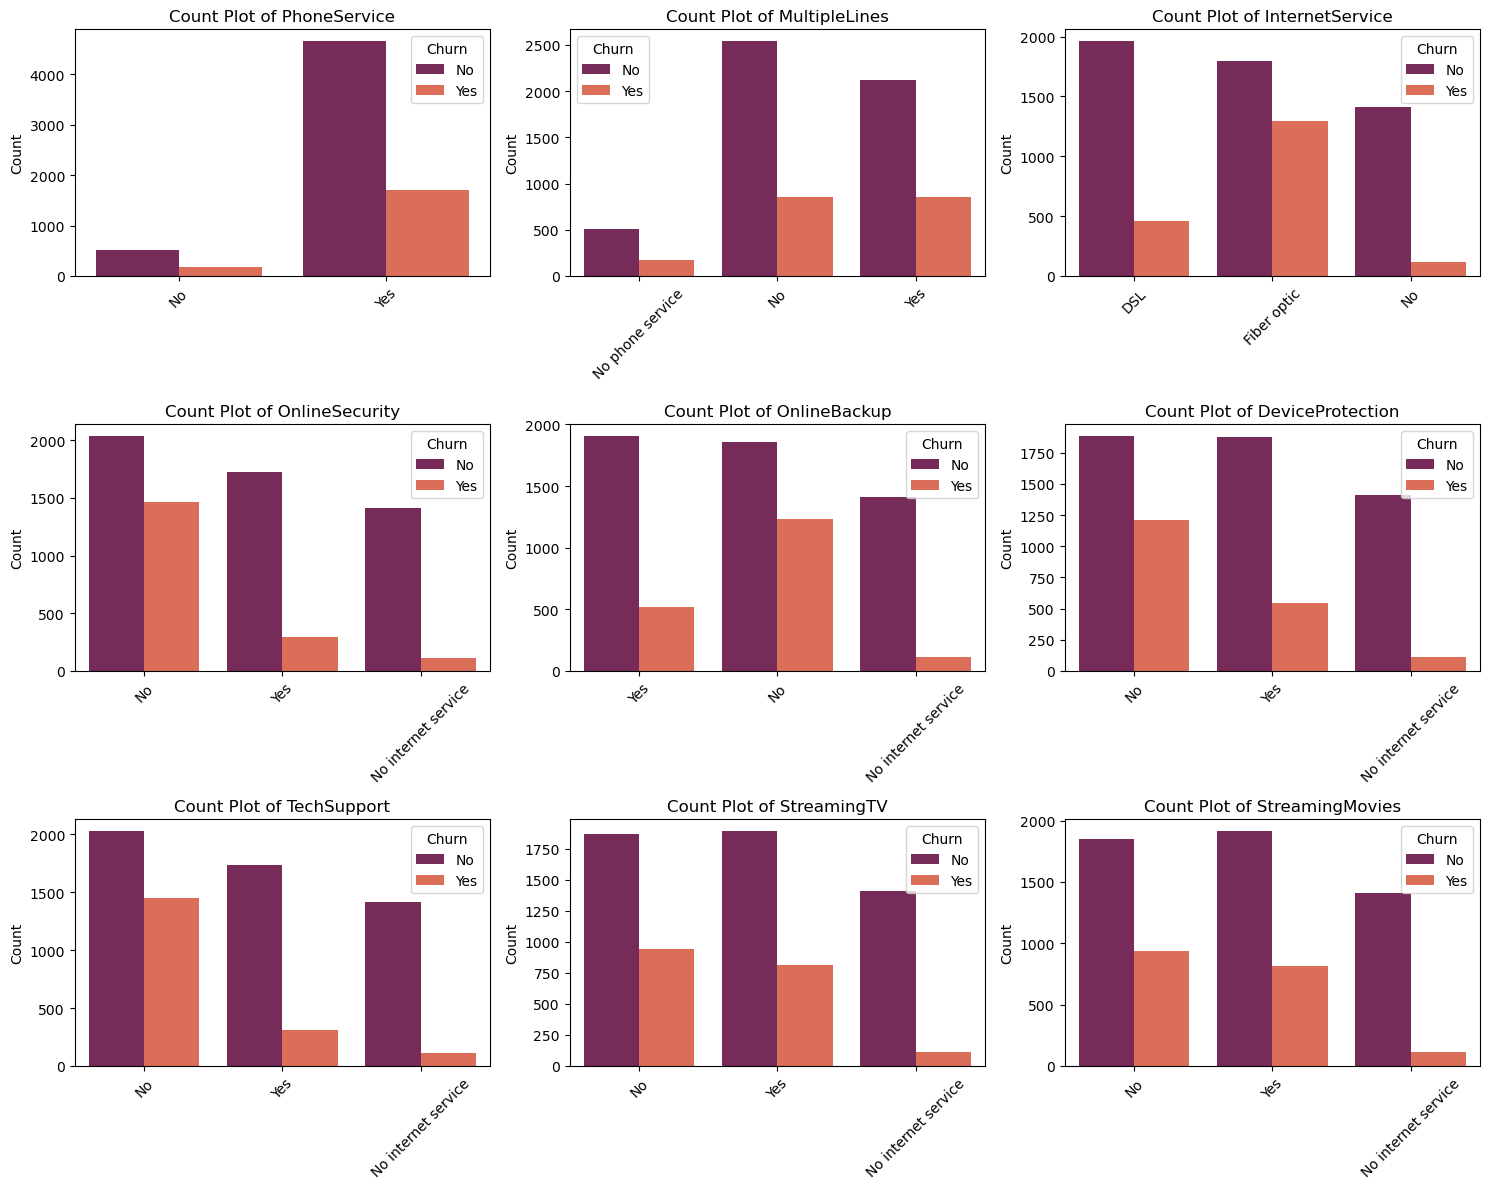

In [29]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define grid size (adjust based on number of columns)
rows = 3  # Number of rows
cols_per_row = 3  # Number of columns per row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 12))  # Create subplots

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i],hue='Churn',palette='rocket')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability

# Hide any unused subplots (if cols < total grid spaces)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for readability
plt.show()


#customers without OnlineSecurity, TechSupport, and OnlineBackup tend to have a higher churn rate, suggesting these services may play a role in retention. Fiber optic users show a greater proportion of churn compared to DSL or no internet service. Customers with PhoneService and MultipleLines exhibit a more balanced churn distribution, implying a weaker relationship with churn. Overall, security, backup, and tech support services appear to be key factors in customer retention.

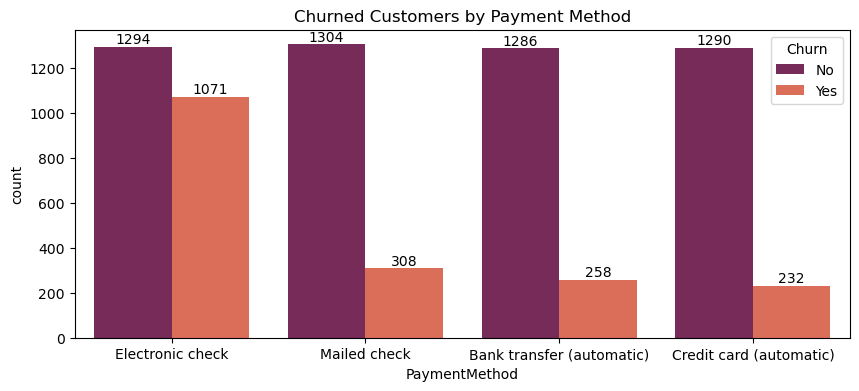

In [31]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=df,x='PaymentMethod',hue='Churn',palette='rocket')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers by Payment Method')
plt.show()

#Customer is likely to Churn when he is using electronic check as payment method